# Import Necessary Library

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


# Reading Image Data

In [2]:
Parasitized_cell=os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/')

uninfected_cell=os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/')

print("parasitized cell:",len(Parasitized_cell))
print("Uninfcted cell:",len(uninfected_cell))

parasitized cell: 13780
Uninfcted cell: 13780


# Visualization Cell Images

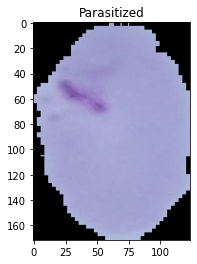

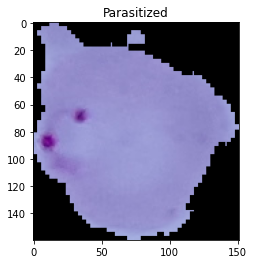

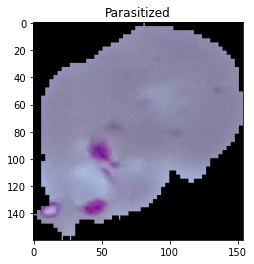

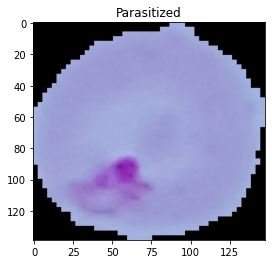

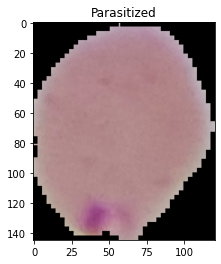

In [3]:
for i in range(5):
    img=cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'+Parasitized_cell[i])
    plt.imshow(img)
    plt.title("Parasitized")
    plt.show()

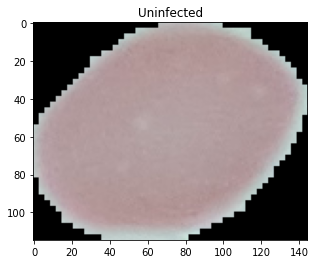

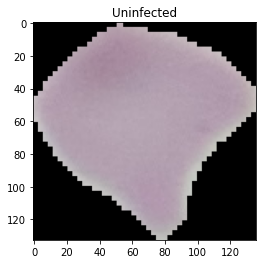

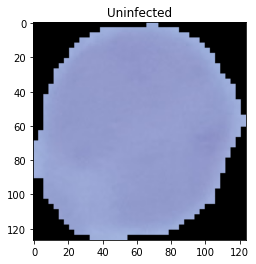

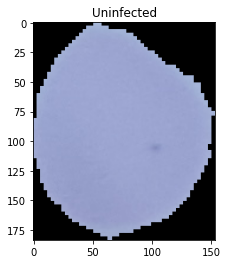

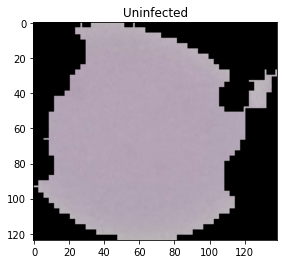

In [4]:
for i in range(5):
    img=cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'+uninfected_cell[i])
    plt.imshow(img)
    plt.title("Uninfected")
    plt.show()

##  Resizeing the cell images

In [5]:
width = 68
height = 68

# Splitting Dataset

In [6]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing Train and Test data Generator

In [7]:
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


## It will automatically assign label 

In [8]:
trainDatagen.class_indices


{'Parasitized': 0, 'Uninfected': 1}

In [9]:
valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')


Found 5510 images belonging to 2 classes.


# Creating CNN Model

In [10]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(width,height,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 66, 66, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 33, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history=model.fit_generator(generator=trainDatagen,
                            steps_per_epoch=len(trainDatagen),
                            epochs=6,
                            validation_data=valDatagen ,
                            validation_steps=len(valDatagen )
                           )


Epoch 1/6
1378/1378 [==============================] - 76s 55ms/step - loss: 0.5763 - accuracy: 0.6932 - val_loss: 0.2902 - val_accuracy: 0.9243
Epoch 2/6
1378/1378 [==============================] - 40s 29ms/step - loss: 0.2407 - accuracy: 0.9164 - val_loss: 0.2034 - val_accuracy: 0.9336
Epoch 3/6
1378/1378 [==============================] - 41s 29ms/step - loss: 0.1963 - accuracy: 0.9320 - val_loss: 0.1983 - val_accuracy: 0.9062
Epoch 4/6
1378/1378 [==============================] - 39s 29ms/step - loss: 0.1770 - accuracy: 0.9451 - val_loss: 0.1697 - val_accuracy: 0.9385
Epoch 5/6
1378/1378 [==============================] - 40s 29ms/step - loss: 0.1604 - accuracy: 0.9474 - val_loss: 0.1685 - val_accuracy: 0.9356
Epoch 6/6
1378/1378 [==============================] - 39s 28ms/step - loss: 0.1520 - accuracy: 0.9518 - val_loss: 0.1712 - val_accuracy: 0.9314


# Ploting Accuracy Of Our Model

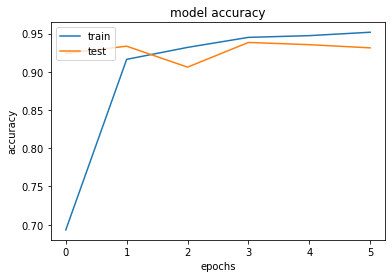

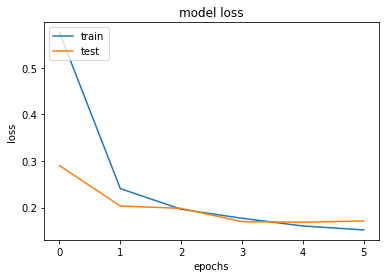

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#  Testing Our Model 

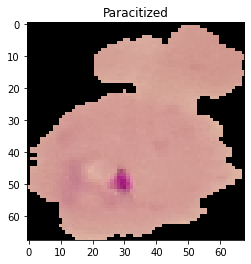

In [15]:
testimg_path="../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png"
img=image.load_img(testimg_path,target_size=(68,68))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
    plt.title("Paracitized")
else:
    plt.title("Uninfected")